In [91]:
from pyspark.sql import SparkSession
spark_session = SparkSession.builder\
        .master("spark://192.168.2.144:7077")\
        .appName("project-test2")\
        .config("spark.cores.max", 4)\
        .getOrCreate()

23/03/10 13:20:06 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [ ]:
en_1 = spark_session.read.json("hdfs://192.168.2.144:9000/user/ubuntu/RC_2010-06_processed.json", multiLine=True)
print(f"Number of lines {en_1.count()}")
lines_test = en_1.take(1)
print(lines_test)

In [6]:
import Ipynb_importer

# Timing 10 runs for each experiment

In [9]:
%%timeit -r 10 -n 1 

import Test1_YuqiongZhang

#Read records
#lines_test=
#lines_test=
#lines_test=

#Call word frequency function
Test1_YuqiongZhang.len_line(lines_test)


The slowest run took 7.27 times longer than the fastest. This could mean that an intermediate result is being cached.
3.1 µs ± 3.28 µs per loop (mean ± std. dev. of 10 runs, 1 loop each)


# Ploting graphs

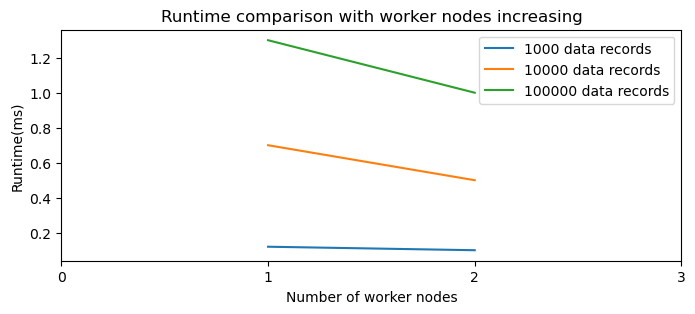

In [88]:
import matplotlib.pyplot as plt

#Runtime comparison with worker nodes increasing
x = [1,2]
y1 = [0.12,0.1]
y2 = [0.7,0.5]
y3 = [1.3,1.0]

plt.figure(figsize=(8,3))
plt.plot(x,y1,label='1000 data records')
plt.plot(x,y2,label='10000 data records')
plt.plot(x,y3,label='100000 data records')
plt.legend(loc='upper right') 
plt.xlabel('Number of worker nodes')
plt.ylabel('Runtime(ms)')
plt.title('Runtime comparison with worker nodes increasing')
plt.xticks(range(4),[0,1,2,3])
plt.show()


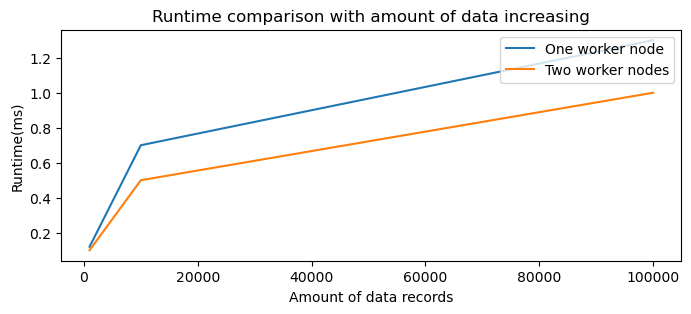

In [93]:
import matplotlib.pyplot as plt

#Runtime comparison with amount of data increasing
x = [1000,10000,100000]
y1 = [0.12,0.7,1.3]
y2 = [0.1,0.5,1.0]


plt.figure(figsize=(8,3))
plt.plot(x,y1,label='One worker node')
plt.plot(x,y2,label='Two worker nodes')
plt.legend(loc='upper right') 
plt.xlabel('Amount of data records')
plt.ylabel('Runtime(ms)')
plt.title('Runtime comparison with amount of data increasing')
#plt.xticks(range(3),[1000,10000,100000])
plt.show()


In [90]:
spark_session.stop() 